In [1]:
import os
import cv2
import matplotlib.pyplot as plt

tomato_dataset_path = 'D:/Mini_Project/Datasets/Tomato/'

def load_images_from_subfolders(folder):
    images = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg'):
                img = cv2.imread(os.path.join(root, file))
                if img is not None:
                    # Convert BGR to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
    return images

tomato_images = load_images_from_subfolders(tomato_dataset_path)

print("Number of Tomato Images:", len(tomato_images))

Number of Tomato Images: 2400


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical



In [3]:
dataset_path = "D:/Mini_Project/Datasets/Tomato/"

images = []
labels = []

ripening_stages = {
    "Overripe": 0,
    "Ripe": 1,
    "Unripe": 2,
}

for ripening_stage, label in ripening_stages.items():
    folder_path = os.path.join(dataset_path, ripening_stage)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (100, 100))
        images.append(image)
        labels.append(label)

In [4]:
images = np.array(images)
labels = np.array(labels)
images = images.astype('float32') / 255.0
labels = to_categorical(labels, num_classes=len(ripening_stages))

In [5]:
import os
import cv2
import numpy as np
from collections import defaultdict

dataset_dir = r'D:\Mini_Project\Datasets\Tomato' 
split_ratio = 0.8 

def load_images_from_subfolders(folder, target_shape=(500, 500)):
    images = defaultdict(list)
    for label in os.listdir(folder):
        label_dir = os.path.join(folder, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img, target_shape)
                images[label].append(img_resized)
    return images

images_by_class = load_images_from_subfolders(dataset_dir)

train_images = defaultdict(list)
test_images = defaultdict(list)
for label, images in images_by_class.items():
    num_samples = len(images)
    num_train_samples = int(num_samples * split_ratio)
    train_images[label] = images[:num_train_samples]
    test_images[label] = images[num_train_samples:]

train_dir = r'D:\Mini_Project\Datasets\Tomato_stages\Train'  
test_dir = r'D:\Mini_Project\Datasets\Tomato_stages\Test'

for label, images in train_images.items():
    for i, image in enumerate(images):
        img_name = f'train_{label}_{i}.jpg'
        img_path = os.path.join(train_dir, label, img_name)
        os.makedirs(os.path.dirname(img_path), exist_ok=True)
        cv2.imwrite(img_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Save testing images
for label, images in test_images.items():
    for i, image in enumerate(images):
        img_name = f'test_{label}_{i}.jpg'
        img_path = os.path.join(test_dir, label, img_name)
        os.makedirs(os.path.dirname(img_path), exist_ok=True)
        cv2.imwrite(img_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

print("Images saved successfully!")


Images saved successfully!


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

train_dir = r'D:\Mini_Project\Datasets\Tomato_stages\Train'
test_dir = r'D:\Mini_Project\Datasets\Tomato_stages\Test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator,
          epochs=16,
          validation_data=test_generator)

loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)


Found 1920 images belonging to 3 classes.
Found 480 images belonging to 3 classes.
Epoch 1/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 57s 860ms/step - accuracy: 0.4994 - loss: 2.7648 - val_accuracy: 0.8208 - val_loss: 0.4421
Epoch 2/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 850ms/step - accuracy: 0.8122 - loss: 0.5075 - val_accuracy: 0.8521 - val_loss: 0.3919
Epoch 3/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 847ms/step - accuracy: 0.8109 - loss: 0.4493 - val_accuracy: 0.8875 - val_loss: 0.3103
Epoch 4/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 863ms/step - accuracy: 0.8562 - loss: 0.3673 - val_accuracy: 0.8687 - val_loss: 0.3453
Epoch 5/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 864ms/step - accuracy: 0.8909 - loss: 0.3074 - val_accuracy: 0.8458 - val_loss: 0.3890
Epoch 6/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 841ms/step - accuracy: 0.8632 - loss: 0.3515 - val_accuracy: 0.8354 - val_loss: 0.4420
Epoch 7/16
60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 835ms/step - accuracy: 0.8505 - loss: 0.3639 - val_accuracy: 0.9187 - val_loss: 0.2684
Epoch 8/16
60/

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


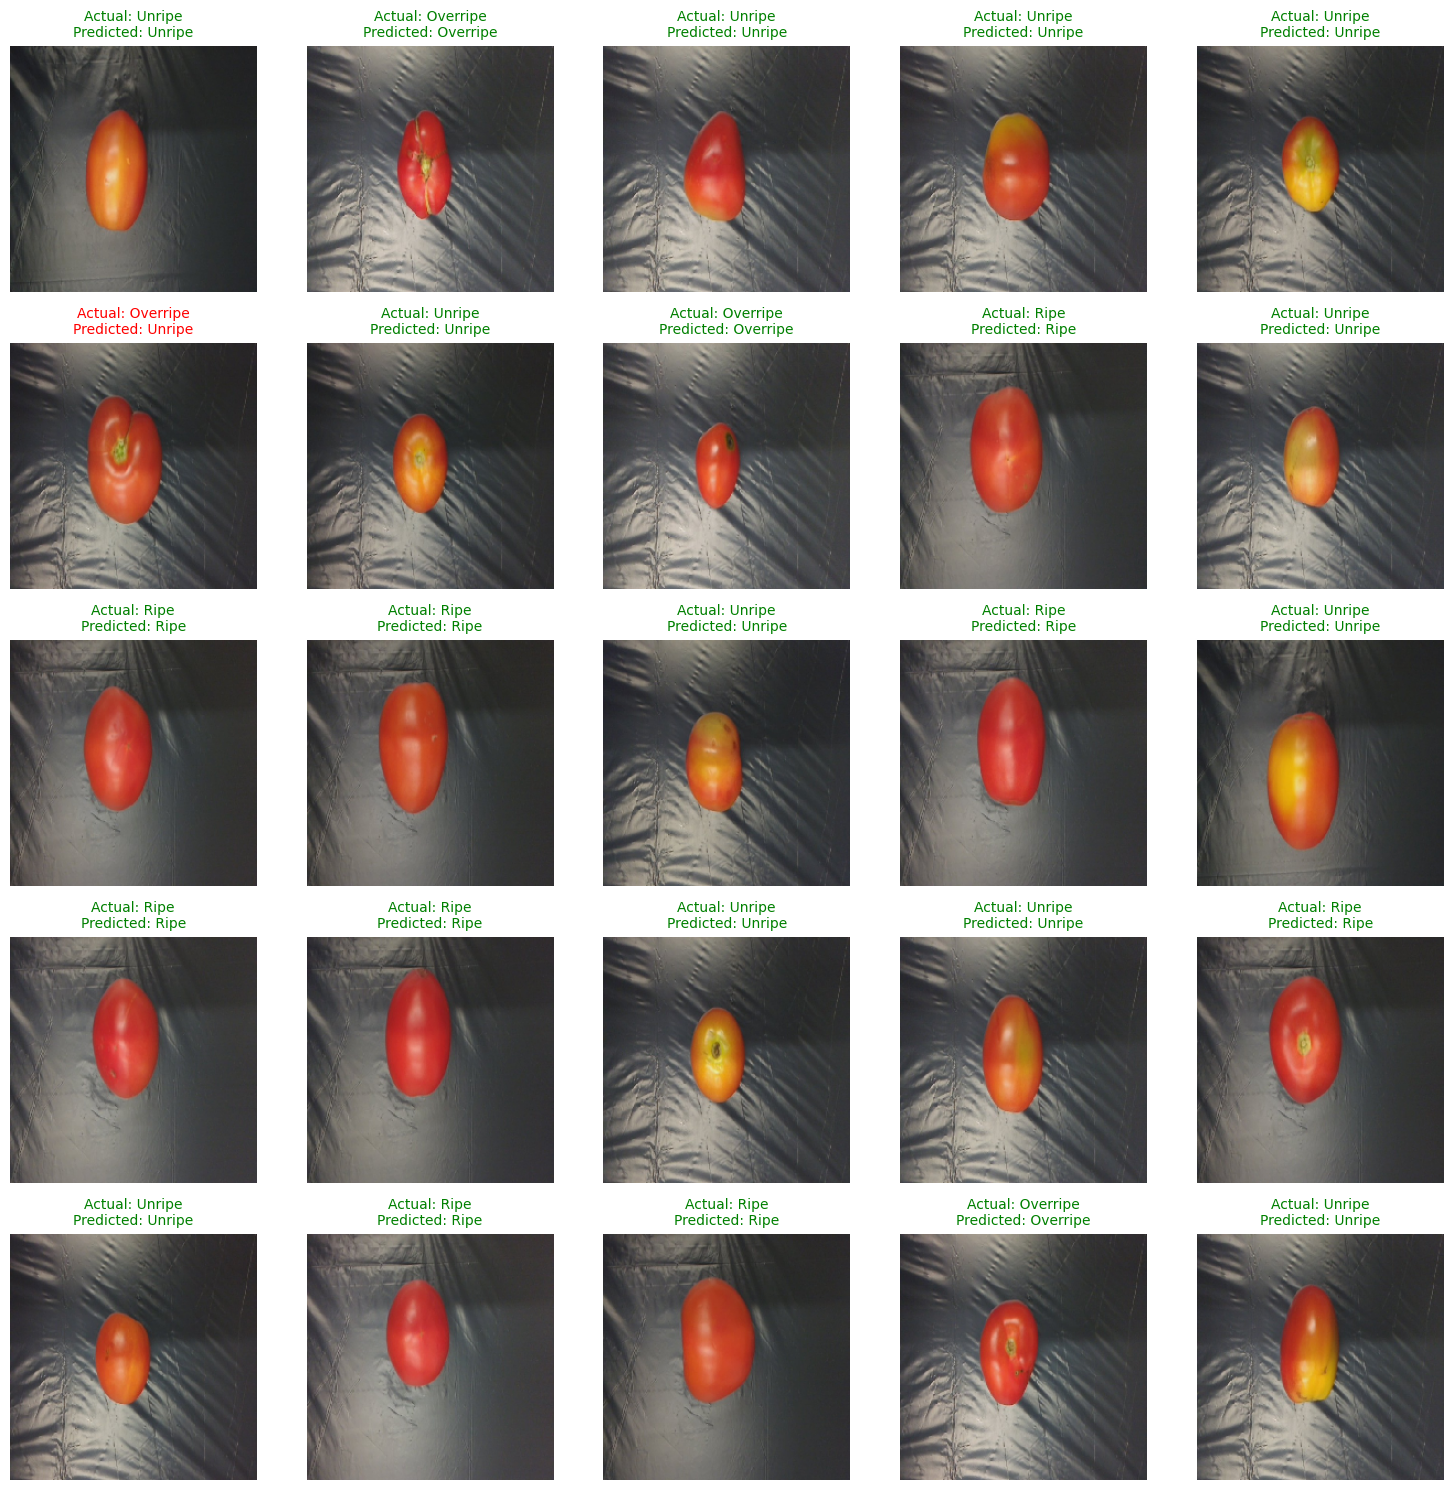

In [10]:
import numpy as np
import matplotlib.pyplot as plt

test_samples, test_labels = next(test_generator)
predictions = model.predict(test_samples)
predicted_labels = np.argmax(predictions, axis=1)
class_names = ['Overripe', 'Ripe', 'Unripe']

num_samples = min(len(test_samples), 25)  
plt.figure(figsize=(15, 15))

for i in range(num_samples):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_samples[i])
    plt.axis('off')
    true_label = class_names[int(np.argmax(test_labels[i]))]
    predicted_label = class_names[int(predicted_labels[i])]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f'Actual: {true_label}\nPredicted: {predicted_label}', color=color, fontsize=10)

plt.tight_layout()
plt.show()


In [12]:
from keras.models import load_model

model_path = 'D:/Mini_Project/fruit_analyzer_app/models/tomato_stages_model.h5'
model.save(model_path)
